# <center> <font color = "red"> Projeto 3 - Desenvolvimento humano altera a mortalidade infantil? </font></center>
### <center>  Martim José e Thiago Carletti</center>

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

### <center><font color = "red"> Introdução </font></center>

O projeto tem como intuito descobrir a influência que variáveis influenciam na mortalidade infantil por meio da análise de regressão múltipla das mesmas; para, assim, obter mais informações desses gargalos.

### <center><font color = "red"> Escolha das Variáveis </font></center>

<b>Variável dependente:</b> Mortalidade Infantil de crianças abaixo de 5 anos (mortes/1000 nascimentos)
<br>
<b>Variável explicativa 1:</b> PIB per capta 
<br>
<b>Variável explicativa 2:</b> % da população geral com saneamento básico
<br>
<b>Variável explicativa 4:</b> Índice de Desenvolvimento Urbano
<br>
<br>
Como o <u>saneamento básico</u>, a <u>renda per capta</u> e o <u>índice de
desenvolvimento humano</u> influenciam a <b><font color = "red">mortalidade infantil</font></b>.

___
Para trabalhar com um banco de dados sem erros, devemos filtrar todos os erros (NaN):

In [3]:
dados = pd.read_excel('data.xlsx',index_col=0)
dados=dados[~np.isnan(dados.MortalidadeAbaixo5)]
dados=dados[~np.isnan(dados.Saneamento)]
dados=dados[~np.isnan(dados.PIBPerCapta)]
dados=dados[~np.isnan(dados.IDH)]

### <center> 1) <font color = "red"> Considerando a sua base de dados construída na 1ª etapa, faça uma análise descritiva aos dados de acordo com o problema definido pelo grupo. </font></center>

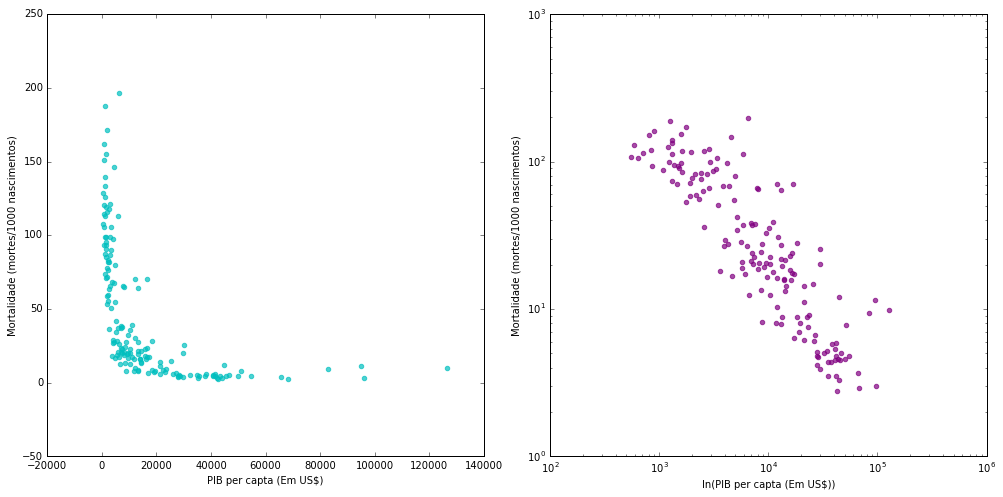

In [4]:
f, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(dados.PIBPerCapta, dados.MortalidadeAbaixo5, alpha=0.7, color = "c")  # Plot the raw data
ax[0].set_xlabel("PIB per capta (Em US$)")
ax[0].set_ylabel("Mortalidade (mortes/1000 nascimentos)")

ax[1].scatter(dados.PIBPerCapta, dados.MortalidadeAbaixo5, alpha=0.7, color = "purple")  # Plot the raw data
ax[1].set_xlabel("ln(PIB per capta (Em US$))")
ax[1].set_ylabel("Mortalidade (mortes/1000 nascimentos)")
ax[1].set_yscale('log')
ax[1].set_xscale('log')

plt.tight_layout(1)

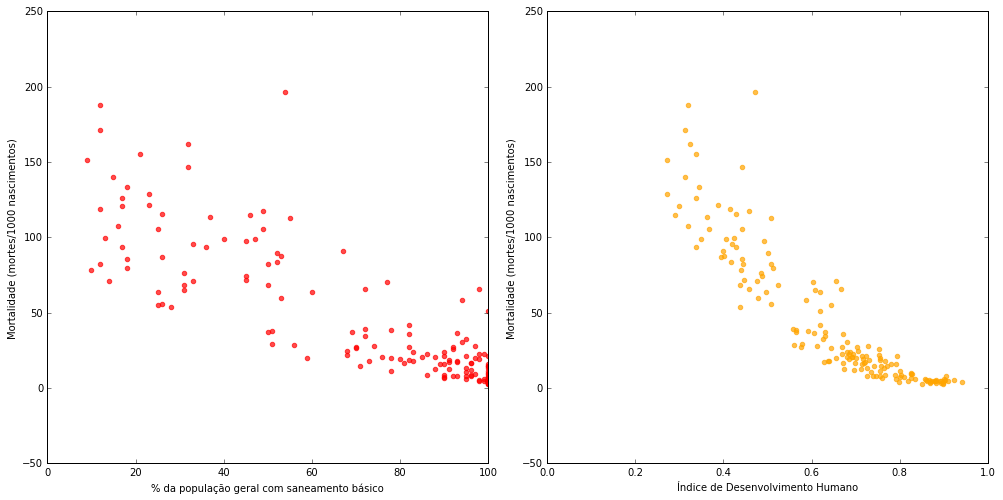

In [5]:
f, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(dados.Saneamento, dados.MortalidadeAbaixo5, alpha=0.7, color = "red")  # Plot the raw data
ax[0].set_xlabel("% da população geral com saneamento básico")
ax[0].set_ylabel("Mortalidade (mortes/1000 nascimentos)")
ax[0].set_xlim(0,100)

ax[1].scatter(dados.IDH, dados.MortalidadeAbaixo5, alpha=0.7, color = "orange")  # Plot the raw data
ax[1].set_xlabel("Índice de Desenvolvimento Humano")
ax[1].set_ylabel("Mortalidade (mortes/1000 nascimentos)")
ax[1].set_xlim(0,1)

plt.tight_layout(1)

In [6]:
dados.corr(method='pearson').iloc[:,1:2]

,MortalidadeAbaixo5
Saneamento,-0.850355
MortalidadeAbaixo5,1.000000
IDH,-0.898902
PIBPerCapta,-0.529589


É observado que, dentre as variáveis explicativas escolhidas as que mais têm correlação com a variável dependente são: <b>Saneamento</b> e <b>IDH</b>, portanto, quanto maior é o valor da correla Todas as correlações são <b>negativas</b>, isto é para cada aumento de 1 unidade na variável IDH ocorre uma diminuição de 0.898902 na variável Mortalidade. E quando há um aumento de 1 unidade na variável Saneamento, ocorre uma diminução de 0.850355 na variável Mortalidade. O mesmo ocorre com a variável PIB per Capta.
<br>

Obs: Para a correlação de Mortalidade e PIB, escolhemos utilizar PIB em uma escala de LOG, para melhor vizualizar a correlação. 

### <center> 1.1) <font color = "red"> Ajuste um modelo de regressão múltipla aos dados de acordo com o problema definido pelo grupo</font></center>

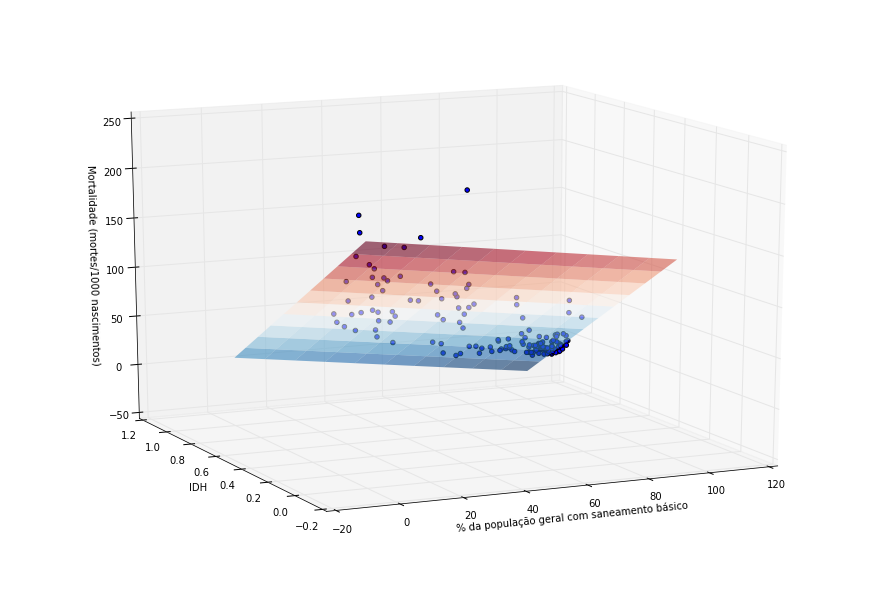

In [7]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Saneamento', 'IDH']]
y = dados['MortalidadeAbaixo5']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(0, 100, 100), 
                       np.linspace(0, 1, 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Saneamento, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Saneamento, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel("% da população geral com saneamento básico")
ax.set_ylabel('IDH')
ax.set_zlabel("Mortalidade (mortes/1000 nascimentos)")

### <center> 1.2) <font color = "red">Teste de hipóteses, para checar se as variáveis são relevantes. </font></center>

In [8]:
y=dados.MortalidadeAbaixo5
X=dados.iloc[:,(0,2)]
X=sm1.add_constant(X)

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MortalidadeAbaixo5   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     377.9
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.43e-61
Time:                        23:17:22   Log-Likelihood:                -710.63
No. Observations:                 163   AIC:                             1427.
Df Residuals:                     160   BIC:                             1437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        181.3417      6.104     29.708      0.000       169.286   193.397
Saneamento    -0.4055      0.102     -3.976      0.000        -0.607    -0.204
IDH         -167.4896     17.314     -9.673      0.000      -201.684  -133.296
==============================================================================
Omnibus:                       86.296   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.488
Skew:                           1.827   Prob(JB):                    9.74e-124
Kurtosis:                      11.370   Cond. No.                         928.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Equação de Regressão Múltipla:</b>

$\beta_{0}=181.3417$

$\beta_{1}=-0.4055$

$\beta_{2}=-167.4896$

<center>$MI = \beta_{0} + \beta_{1} \cdot S + \beta_{2} \cdot IDH$

____

Teste de hipóteses para se $\beta_{0}$ influencia na Equação de Regressão Múltipla.

$H_0: \beta_{0} = 0$

$H_1: \beta_{0} \neq 0$

$T_0 = \frac{\hat{\beta_{0}} - 0}{\sqrt{\hat{\sigma^2}/S_xx}}$


Teste de hipóteses para se $\beta_{1}$ influencia na Equação de Regressão Múltipla.

$H_0: \beta_{1} = 0$

$H_1: \beta_{1} \neq 0$

$T_0 = \frac{\hat{\beta_{1}} - 0}{\sqrt{\hat{\sigma^2}/S_xx}}$


Teste de hipóteses para se $\beta_{2}$ influencia na Equação de Regressão Múltipla.

$H_0: \beta_{2} = 0$

$H_1: \beta_{2} \neq 0$

$T_0 = \frac{\hat{\beta_{2}} - 0}{\sqrt{\hat{\sigma^2}/S_xx}}$


Por meio do Teste t e do cálculo dos coeficientes foi obtido que, diante do problema apresentado, a propabilidade da influÊncia exercida pelas variáveis escolhidas não ocorrer é zero. Sendo assim, a hipótese nula para as três variáveis é rejeitada e a alternativa é aceita para todas as variáveis.

### <center> 2) <font color = "red">Verifique a adequação das suposições do modelo e a qualidade do ajuste.</font></center>

O modelo se encaixa com os dados obtidos e o ajuste do mesmo está correto, visto que os valores obtidos no Teste White são próximos de zero; demonstrando que os erros são homocedásticos.


In [9]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#http://hedibert.org/wp-content/uploads/2014/05/Econometria201401-Aula14-ARLMXI-Homocedasticidade.pdf
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(3.6407304320397817,
 0.60220835952944785,
 0.71736608655385847,
 0.61129364229504102)

### <center> 3) <font color = "red">Interprete os parâmetros.</font></center>

O modelo dado pela equação:

<center>$MI = 181.3417 - 0.4055 \cdot S - 187.4896 \cdot IDH$,

mostra que quando há um aumento de 1% do IDH, a mortalidade infntil decai em, aproximadamente, 187 crianças; ou seja, a cada 1% elevado no IDH, 187 cranças sobrevivem. Já para o saneamento básico, a cada 1% de aumento, 0.4055 crianças sobrevivem.

Ao observarmos o R-Squared na tabela, igual a 0.825, obtemos que o modelo se aplica em 82.5% dos casos; visto que essa variável indica a porcentagem de equivalência entre o modelo e os casos reais. O mesmo ocorre com o Adj. R-squared, que possui um valor menor por levar em conta o número de observações.

Já para verificar a real influência dos valores de beta para a regressão utilizamos os valores do F-statistic e do Prob (F-statistic), que são provenientes do Teste F e tem como função verificar a probabilidade de aceitação de uma hipótese nula definida pela "Não influência das variáveis independentes sobre a dependente"; que, no caso, deve ser rejeitada visto que a Prob (F-statistic) é igual a 2.43e-61. Para poder rejeitar essa hipótese com ainda mais certeza utilizamos o valor dado pelo P>|t|, que é resultado de um Teste t com o mesmo objetivo do Teste F: calcular a relevância da variável para o modelo; assim, quanto menor o valor em questão, maior a probabilidade da variável ser relevante. No caso, as três variáveis possuem alta relevância, visto que seu P>|t| foi igual a zero.

Os valores dados por AIC e BIC são altos, indicando uma perda de informações devido a complexidade do modelo; algo negativo, mas que pode ser ignorado devido os valores do R-Squared.

Ao analisarmos a terceira tabela do item 1.2, verificamos como ocorre a distribuição dos resíduos da amostra. É procurado que os resíduos possuam uma distribuição normal com média igual a zero; algo que ocorre, visto que a Prob(Omnibus) e a Prob(JB) possuem, respectivamente, os valores de 0.000 e 9.74e-124. 

Por fim, através da observação do Prob (F-statistic), percebe-se que não é recomendável a representação do modelo por meio de logarítimos, visto que seu valor é de 2.43e-61; algo que é confirmado pelo Log-Likelihood, cujo valor é de -710.63. 

### <center> 3) <font color = "red">Resumo</font></center>

De acordo com os resultados obtidos por meio das tabelas no item 1.2 e com as avaliações no item 2, vemos que ambos os paâmetros (IDH e Saneamento) influênciam na variável independente Mortalidade Infantil. Essa influência existente entre as variáveis dependenes e independentes é negtiva, ou seja, quanto maior o IDH, por exemplo, menor será a mortalidade infantil; e, ao observar os valores de beta 1 e beta 2, percebemos que o IDH gera mais influência na mortalidade infanil que o saneamento básico.

Portanto, essa é uma regressão linear múltipla cuja variável depentende é influênciada por duas outras, saneamento e IDH, de acordo com a seguinte expressão:

<center>$MI = 181.3417 - 0.4055 \cdot S - 187.4896 \cdot IDH$

e, cujos erros, apresentam homocedasticidade.

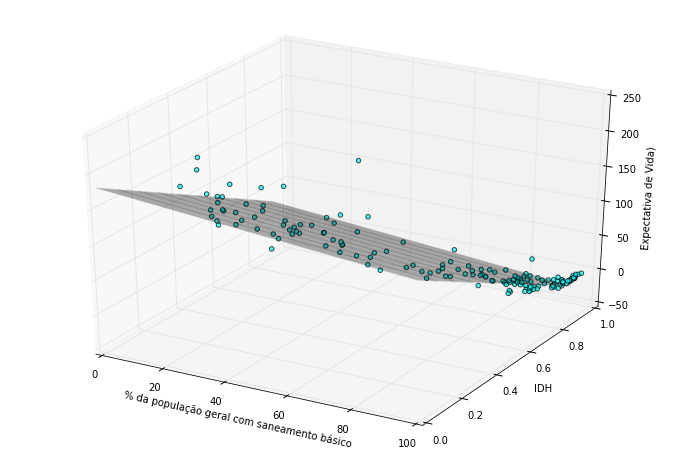

In [10]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='MortalidadeAbaixo5 ~ Saneamento + IDH', data = dados)
fit = model.fit()
fit.summary()

X = dados[['Saneamento', 'IDH']]
y = dados['MortalidadeAbaixo5']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 1)                # generate a mesh
y_surf = np.arange(0, 1, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Saneamento': x_surf.ravel(), 'IDH': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['Saneamento'], dados['IDH'], dados['MortalidadeAbaixo5'],
           c='cyan',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,1)
ax.set_xlabel('% da população geral com saneamento básico')
ax.set_ylabel('IDH')
ax.set_zlabel('Expectativa de Vida)')

### <center> 3) <font color = "red">Comparando o modelo de regresão Global com o Modelo de países separados por IDH</font></center>

Grupos de IDH:

<b>Grupo 1:</b> IDH >= 0.700
<br>
<b>Grupo 2:</b> 0.700 > IDH >= 0.500
<br>
<b>Grupo 3:</b> IDH < 0.500

In [11]:
IDH1 = dados[(dados["IDH"] >= 0.7)]
IDH2 = dados[(dados["IDH"] < 0.7) & (dados["IDH"] >= 0.5)]
IDH3 = dados[(dados["IDH"] < 0.5)]

In [12]:
y=IDH1.iloc[:,1]
X=IDH1.iloc[:, (0,2)]
X=sm1.add_constant(X)

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MortalidadeAbaixo5   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     55.51
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           5.08e-15
Time:                        23:17:23   Log-Likelihood:                -202.47
No. Observations:                  71   AIC:                             410.9
Df Residuals:                      68   BIC:                             417.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         77.3617      6.591     11.738      0.000        64.210    90.513
Saneamento    -0.1315      0.076     -1.733      0.088        -0.283     0.020
IDH          -67.5510      9.208     -7.336      0.000       -85.926   -49.176
==============================================================================
Omnibus:                        8.433   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.060
Skew:                           0.680   Prob(JB):                       0.0178
Kurtosis:                       3.935   Cond. No.                     1.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y=IDH2.iloc[:,1]
X=IDH2.iloc[:, (0,2)]
X=sm1.add_constant(X)

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MortalidadeAbaixo5   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     25.71
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           3.57e-08
Time:                        23:17:23   Log-Likelihood:                -200.25
No. Observations:                  48   AIC:                             406.5
Df Residuals:                      45   BIC:                             412.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        184.1022     28.026      6.569      0.000       127.656   240.549
Saneamento    -0.2657      0.128     -2.078      0.043        -0.523    -0.008
IDH         -201.7366     53.181     -3.793      0.000      -308.848   -94.625
==============================================================================
Omnibus:                        8.659   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                7.761
Skew:                           0.888   Prob(JB):                       0.0206
Kurtosis:                       3.852   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y=IDH3.iloc[:,1]
X=IDH3.iloc[:, (0,2)]
X=sm1.add_constant(X)

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MortalidadeAbaixo5   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     10.49
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           0.000209
Time:                        23:17:23   Log-Likelihood:                -208.17
No. Observations:                  44   AIC:                             422.3
Df Residuals:                      41   BIC:                             427.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        223.7908     26.934      8.309      0.000       169.396   278.186
Saneamento    -0.2492      0.287     -0.870      0.390        -0.828     0.330
IDH         -272.9429     72.883     -3.745      0.001      -420.134  -125.752
==============================================================================
Omnibus:                       30.999   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.365
Skew:                           1.883   Prob(JB):                     1.93e-16
Kurtosis:                       8.029   Cond. No.                         650.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Após relizar a mesma análise feita no item dois, obtemos que o R-squared reduz conforme a redução do IDH. Isso ocorre, visto que a precisão do modelo vai reduzindo devido a imprecisão na real influência da variável Saneamento conforme há uma redução no IDH; chegando a valores de 43% para o P>|t| dessa variável. 

Tal fator, possivelmente, é resultado da morte prepatura de crianças causada por fatores influenciados pelo o IDH, como é o caso da morte da criança durante o parto. Em casos como esse, o óbito como resultado de outros fatores  ocorre antes que os problemas gerados pela falta de saneamento básico atuem sobre a saúde da criança; assim, o saneamento básico não se torna um fator que influencia na mortalidade infatil. 

### <center> <font color = "red">Conclusão</font></center>

Após relizar a mesma análise feita no item dois, obtemos que o modelo de regressão múltipla pode ser utilizado em escala global, mas não é recomendado para subgrupos divididos pelo IDH; pois conforme o IDH diminui, outros fatores gerados por essa redução passam a ter mais influência na mortalidade infantil do que o Saneamento Básico.

Material de auxílio para a construção do projeto

https://github.com/mirwox/CDEng/blob/master/Projeto3/Exemplo%20Proj3.ipynb
http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb
https://github.com/mirwox/CDEng/blob/master/Projeto3/Aula29%20Modelo%20de%20regress%C3%A3o%20NOVO.pdf
https://github.com/filipefborba/CD/blob/master/Projeto3/Projeto%203%20-%20Borba%20e%20Michel.ipynb